### Student Information
Name:王皓澤

Student ID:112065509

GitHub ID:Haoze0102

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

### Begin Assignment Here

#### Part 1 - Take Home Exercises

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

#learn the vocabulary and return document-term matrix
count_vect = CountVectorizer()
train_df_counts = count_vect.fit_transform(train_df.text) 

#TOP30 Term Frequencies (Train data)
train_term_frequencies = []
train_counts_arr = train_df_counts.sum(axis=0).tolist()[0]
for j in range(0, train_df_counts.shape[1]):
    train_term_frequencies.append(train_counts_arr[j])

freqDF = pd.DataFrame(count_vect.get_feature_names_out(), columns= ['terms'])
freqDF['frequency'] = train_term_frequencies

# sort
freqDF = freqDF.sort_values(by=['frequency'], ascending=False)

fig = px.bar(freqDF[:30], x=freqDF['terms'][:30], y=freqDF['frequency'][:30], title  = "TOP30 Term Frequencies (Train data)", labels = {'x':'Terms', 'y':'Frequencies'})

fig.show()

In [ ]:
#learn the vocabulary and return document-term matrix
count_vect = CountVectorizer()
test_df_counts = count_vect.fit_transform(test_df.text) 

#TOP30 Term Frequencies (Test data)
test_term_frequencies = []
test_counts_arr = test_df_counts.sum(axis=0).tolist()[0]
for j in range(0, test_df_counts.shape[1]):
    test_term_frequencies.append(test_counts_arr[j])

freqDF = pd.DataFrame(count_vect.get_feature_names_out(), columns= ['terms'])
freqDF['frequency'] = test_term_frequencies

# sort
freqDF = freqDF.sort_values(by=['frequency'], ascending=False)

fig = px.bar(freqDF[:30], x=freqDF['terms'][:30], y=freqDF['frequency'][:30], title  = "TOP30 Term Frequencies (Test data)", labels = {'x':'Terms', 'y':'Frequencies'})

fig.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# apply analyzer to training data
vectorizer.fit(train_df['text'])
train_data_TFIDF_feature = vectorizer.transform(train_df['text'])

## check dimension
print(train_data_TFIDF_feature.shape)
print(train_data_TFIDF_feature.toarray())

(3613, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# observe some feature names
feature_names_TFIDF = vectorizer.get_feature_names_out()
feature_names_TFIDF[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
* Total "anger": 84(57+18+6+3)
    * 57 (correct prediction)
    * 18 (Mispredicted as "fear")
    * 6 (Mispredicted as "joy")
    * 3 (Mispredicted as "sadness")
* Total "fear": 110(16+76+9+9)
    * 16 (Mispredicted as "anger")
    * 76 (correct prediction)
    * 9 (Mispredicted as "joy")
    * 9 (Mispredicted as "sadness")
* Total "joy": 79(6+9+56+8)
    * 6 (Mispredicted as "anger")
    * 9 (Mispredicted as "fear")
    * 56 (correct prediction)
    * 8 (Mispredicted as "sadness")
* Total "sadness": 74(7+13+7+47)
    * 7 (Mispredicted as "anger")
    * 13 (Mispredicted as "fear")
    * 7 (Mispredicted as "joy")
    * 47 (correct prediction)

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Text(113.9222222222222, 0.5, 'predicted label')

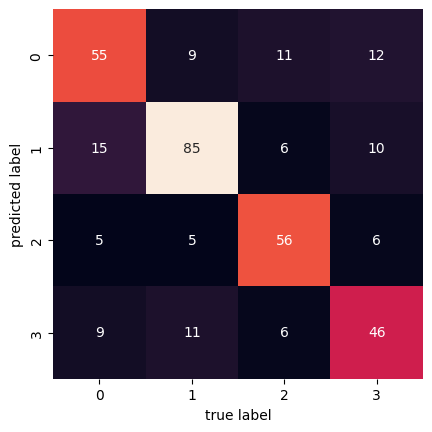

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)

# training
clf.fit(X_train, y_train)

## predict!
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

## so we get the pred result
y_test_pred[:10]

# visulization
cm2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
sns.heatmap(cm2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
The results from the Naive Bayes (NB) model and the Decision Tree (DT) model show differences in training and testing accuracy. To interpret these differences, let's consider some theoretical aspects and potential factors that might explain the variations:
1. Model Complexity:
    * Decision Tree: DT models can be highly expressive and have the capacity to fit the training data very closely, which can lead to overfitting. In your case, the DT model achieves a high training accuracy of 0.99, which suggests that it has learned the training data extremely well.
    * Naive Bayes: NB is a simpler and more probabilistic model that assumes independence between features. It might not fit the training data as closely as the DT, resulting in a training accuracy of 0.79.
2. Overfitting:
    * Decision Tree: A high training accuracy of 0.99 often indicates overfitting, where the model has learned the training data noise and might not generalize well to unseen data.
    * Naive Bayes: With a training accuracy of 0.79, the NB model may not be overfitting the training data as aggressively as the DT.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

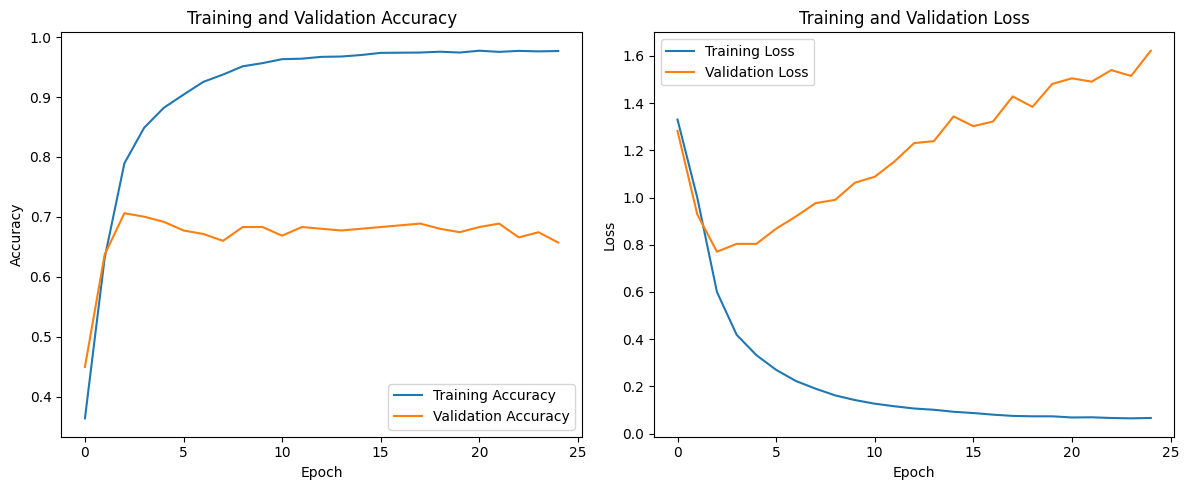

In [ ]:
# Answer here
import matplotlib.pyplot as plt

# Extract training and validation data
train_accuracy = training_log['accuracy']
val_accuracy = training_log['val_accuracy']
train_loss = training_log['loss']
val_loss = training_log['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


From the accuracy curve, we can observe that the model performs exceptionally well on the training data (>0.95 accuracy), indicating that it is not underfitting.

Continuing to inspect the accuracy curve, the model excels on the training data (>0.95 accuracy), but its performance on the validation data is not as good (0.7), indicating the presence of overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
import numpy as np
from gensim.models import Word2Vec

# Assuming you have a list of tokenized sentences in train_df['text_tokenized']
sentences = train_df['text_tokenized']

# Train Word2Vec model (or load a pre-trained model)
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Get word vectors
word_vectors = word2vec_model.wv

# Function to average word vectors for a sentence
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model:
            n_words += 1
            feature_vector = np.add(feature_vector, model[word])
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

# Use average_word_vectors to get sentence vectors for all sentences
train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: average_word_vectors(x, word_vectors, 100))

# Now you can use train_df['sentence_vector'] as input features to train your NLP model
train_df['sentence_vector'].head()

1318    [-0.04403357, 0.26092285, -0.18950818, -0.0357...
2438    [-0.007882515, 0.3435157, -0.053681068, -0.011...
2118    [-0.005933658, 0.18261038, -0.023123799, -0.01...
823     [-0.019299636, 0.3923237, -0.043058716, -0.037...
2149    [-0.0058842488, 0.3913896, -0.08082213, 0.0037...
Name: sentence_vector, dtype: object

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('sad_words: ', fear_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
sad_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'angry', 'irate',

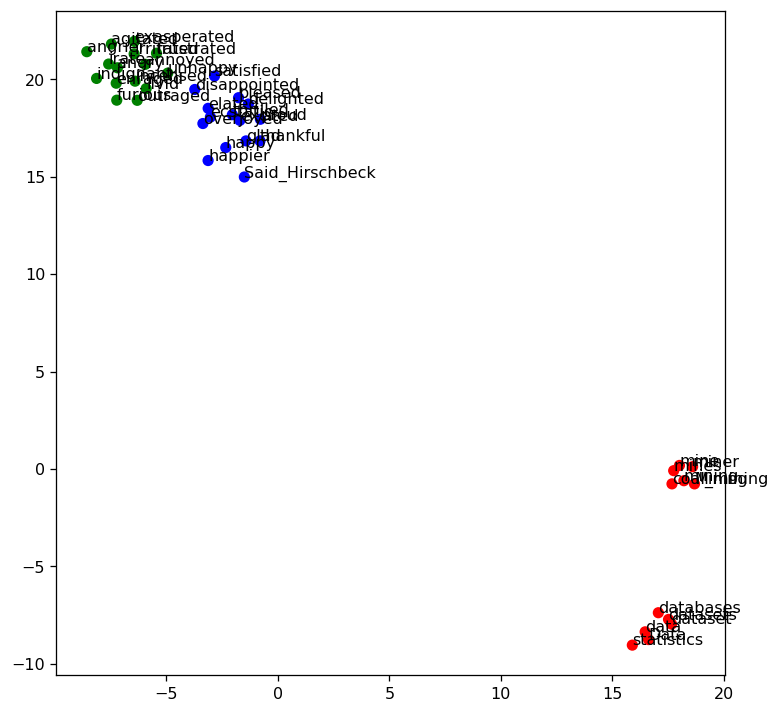

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---


#### Part 2 - Kaggle Competition Score

---

#### Part 3 - Kaggle Competition Report

Data consolidation and organization

In [ ]:

import pandas as pd
import json

# 'data.json'
json_file_path = r'dm2023-isa5810-lab2-homework/tweets_DM.json'

# load json
records = []
with open(json_file_path, 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            
           
            record = data['_source']['tweet']
            record['_score'] = data['_score']
            record['_index'] = data['_index']
            record['_crawldate'] = data['_crawldate']
            record['_type'] = data['_type']
            
            records.append(record)
        except json.JSONDecodeError:
            print("Error decoding JSON:", line)
df = pd.DataFrame(records)

print(df.head())


                        hashtags  tweet_id  \
0                     [Snapchat]  0x376b20   
1  [freepress, TrumpLegacy, CNN]  0x2d5350   
2                   [bibleverse]  0x28b412   
3                             []  0x1cd5b0   
4                             []  0x2de201   

                                                text  _score          _index  \
0  People who post "add me on #Snapchat" must be ...     391  hashtag_tweets   
1  @brianklaas As we see, Trump is dangerous to #...     433  hashtag_tweets   
2  Confident of your obedience, I write to you, k...     232  hashtag_tweets   
3                Now ISSA is stalking Tasha 😂😂😂 <LH>     376  hashtag_tweets   
4  "Trust is not the same as faith. A friend is s...     989  hashtag_tweets   

            _crawldate   _type  
0  2015-05-23 11:42:47  tweets  
1  2016-01-28 04:52:09  tweets  
2  2017-12-25 04:39:20  tweets  
3  2016-01-24 23:53:05  tweets  
4  2016-01-08 17:18:59  tweets  


In [ ]:
# 丟棄不重要的欄位
df.drop(columns=['_index', '_crawldate', '_type', 'hashtags', '_score'], inplace=True)

In [ ]:
df.head()

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."


In [ ]:
import pandas as pd



# load second csv
csv_file_path2 = r'dm2023-isa5810-lab2-homework/data_identification.csv'
df2 = pd.read_csv(csv_file_path2)

# 根據tweet_id進行合併
merged_df = pd.merge(df, df2, on='tweet_id')

# 打print DataFrame
print(merged_df.head())


   tweet_id                                               text identification
0  0x376b20  People who post "add me on #Snapchat" must be ...          train
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...          train
2  0x28b412  Confident of your obedience, I write to you, k...           test
3  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>          train
4  0x2de201  "Trust is not the same as faith. A friend is s...           test


In [ ]:
merged_df.shape[0]

1867535

In [ ]:
import pandas as pd


# 根據 "identification" 進行分組
grouped_df = merged_df.groupby('identification')

# 獲得train和test DataFrame
train_df = grouped_df.get_group('train')
test_df = grouped_df.get_group('test')



In [ ]:
train_df.head()

,tweet_id,text,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>,train


In [ ]:
test_df.head()

,tweet_id,text,identification
2,0x28b412,"Confident of your obedience, I write to you, k...",test
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test
9,0x218443,When do you have enough ? When are you satisfi...,test
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
33,0x26289a,"In these tough times, who do YOU turn to as yo...",test


In [ ]:
import pandas as pd

#將train對應的emotion合併進df
csv_file_path3 = r'dm2023-isa5810-lab2-homework/emotion.csv'
df3 = pd.read_csv(csv_file_path3)


train_df = pd.merge(train_df, df3, on='tweet_id')


In [ ]:
train_df

,tweet_id,text,identification,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1455560,0x2cbca6,there's currently two girls walking around the...,train,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


對 train_fd和test_df的text列進行embedding 使用roberta-base

In [ ]:
import torch
from transformers import AutoTokenizer, RobertaModel

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

In [ ]:
import numpy as np
from tqdm import tqdm
import torch
import pandas as pd

# Assuming you have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU
model.to(device)

# Use tqdm to create a progress bar
embeddings_list = []

for index, row in tqdm(train_df.iterrows(), total=len(train_df), desc="Processing data"):
    text = row['text']
    
    # Move the input tensor to the GPU
    inputs = text
    
    # Move the model outputs to the GPU
    embedding = model.encode([inputs])[0]
    embeddings_list.append(embedding)

# Convert the embedding list to a NumPy array
embedding_array = np.vstack(embeddings_list)

# Add the "embedding" column to the DataFrame
train_df['embedding'] = embedding_array.tolist()

# Reorder the DataFrame columns
columns_order = ['tweet_id', 'text', 'identification', 'emotion', 'embedding']
train_df = train_df[columns_order]

# Change the file path to the Parquet file
parquet_file_path = 'dm2023-isa5810-lab2-homework/train_sentence-transformers_embedding.parquet'

# Save the Parquet file
train_df.to_parquet(parquet_file_path, engine='pyarrow')


Processing data: 100%|██████████| 1455563/1455563 [1:18:13<00:00, 310.10it/s]


In [ ]:
import numpy as np
from tqdm import tqdm
import torch
import pandas as pd

# Assuming you have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU
model.to(device)

# Use tqdm to create a progress bar
embeddings_list = []

for index, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Processing data"):
    text = row['text']
    
    # Move the input tensor to the GPU
    inputs = text
    
    # Move the model outputs to the GPU
    embedding = model.encode([inputs])[0]
    embeddings_list.append(embedding)

# Convert the embedding list to a NumPy array
embedding_array = np.vstack(embeddings_list)

# Add the "embedding" column to the DataFrame
test_df['embedding'] = embedding_array.tolist()

# Reorder the DataFrame columns
columns_order = ['tweet_id', 'text', 'identification', 'embedding']
test_df = test_df[columns_order]

# Change the file path to the Parquet file
parquet_file_path = 'dm2023-isa5810-lab2-homework/test_sentence-transformers_embedding.parquet'

# Save the Parquet file
test_df.to_parquet(parquet_file_path, engine='pyarrow')


Processing data: 100%|██████████| 411972/411972 [21:16<00:00, 322.84it/s]
/tmp/ipykernel_368108/3516915655.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['embedding'] = embedding_array.tolist()


In [ ]:
import pandas as pd
import json
# Change the file path to the Parquet file
parquet_file_path = 'dm2023-isa5810-lab2-homework/train_embedding.parquet'

# Read the Parquet file
train_df = pd.read_parquet(parquet_file_path, engine='pyarrow')


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

將label轉換成one hot encodding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 創建一個 LabelEncoder 實例
label_encoder = LabelEncoder()

# 將 'emotion' 列中的字串標籤轉換為整數
train_df['emotion'] = label_encoder.fit_transform(train_df['emotion'])

# 輸出轉換後的 'emotion' 列的前幾行
print(train_df['emotion'].head())

0    1
1    5
2    3
3    4
4    1
Name: emotion, dtype: int64


In [ ]:
embedding_column = train_df['embedding']

# Method 1: Using type function
embedding_type = type(embedding_column.iloc[0])
print(f"Type of 'embedding' column: {embedding_type}")

Type of 'embedding' column: <class 'numpy.ndarray'>


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# Assuming you have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'embedding' column is already a NumPy array
embedding_column = train_df['embedding']

# Convert the NumPy array to a torch tensor and move to GPU
embeddings = torch.tensor(embedding_column.tolist(), dtype=torch.float32).to(device)

# Convert labels to a torch tensor (assuming you have an 'emotion' column) and move to GPU
labels = torch.tensor(train_df['emotion'], dtype=torch.long).to(device)


/tmp/ipykernel_11680/4186300103.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  embeddings = torch.tensor(embedding_column.tolist(), dtype=torch.float32).to(device)


建立神經網路 DeepenedNN

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch
import torch.nn as nn

num_epochs = 70

class DeepenedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_p=0.4):
        super(DeepenedNN, self).__init__()

        layers = [nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(), nn.BatchNorm1d(hidden_sizes[0])]

        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_sizes[i]))
            layers.append(nn.Dropout(dropout_p))

        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        layers.append(nn.LogSoftmax(dim=1))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Set your input size, hidden sizes, and output size
input_size = len(embeddings[0])
hidden_sizes = [768, 768]  # Adjust based on your preference
output_size = 8  # Adjust based on your number of classes

# Instantiate the deepened model, move it to GPU, and define the loss function and optimizer
model = DeepenedNN(input_size, hidden_sizes, output_size).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=0.0001)


In [ ]:
model

DeepenedNN(
  (model): Sequential(
    (0): Linear(in_features=768, out_features=768, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=768, out_features=768, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=768, out_features=8, bias=True)
    (8): LogSoftmax(dim=1)
  )
)

In [ ]:
# 切割train_loader和test_loader
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader, random_split
# Combine embeddings and labels into a TensorDataset
dataset = TensorDataset(embeddings, labels)

# Split the dataset into training and testing sets (70% training, 30% testing)
#train_size = int(0.7 * len(dataset))
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

AssertionError: Size mismatch between tensors

開始訓練

Epoch 1/70: 100%|██████████| 7961/7961 [00:07<00:00, 1124.65it/s]


Epoch 1/70, Loss: 1.313647975358303
Validation Accuracy: 0.5391223100334578


Epoch 2/70: 100%|██████████| 7961/7961 [00:07<00:00, 1045.15it/s]


Epoch 2/70, Loss: 1.2532789098858579
Validation Accuracy: 0.5399994045833343


Epoch 3/70: 100%|██████████| 7961/7961 [00:07<00:00, 1045.32it/s]


Epoch 3/70, Loss: 1.2357557229234442
Validation Accuracy: 0.5528466641781303


Epoch 4/70: 100%|██████████| 7961/7961 [00:07<00:00, 1123.43it/s]


Epoch 4/70, Loss: 1.2255532860216851
Validation Accuracy: 0.5608504382037653


Epoch 5/70: 100%|██████████| 7961/7961 [00:07<00:00, 1039.79it/s]


Epoch 5/70, Loss: 1.2152744470162542
Validation Accuracy: 0.5638137811477343


Epoch 6/70: 100%|██████████| 7961/7961 [00:07<00:00, 1125.16it/s]


Epoch 6/70, Loss: 1.2065714249103576
Validation Accuracy: 0.5693076449209813


Epoch 7/70: 100%|██████████| 7961/7961 [00:07<00:00, 1075.96it/s]


Epoch 7/70, Loss: 1.2021289537740913
Validation Accuracy: 0.5696259638307276


Epoch 8/70: 100%|██████████| 7961/7961 [00:07<00:00, 1063.41it/s]


Epoch 8/70, Loss: 1.195318594625466
Validation Accuracy: 0.5718541961989516


Epoch 9/70: 100%|██████████| 7961/7961 [00:07<00:00, 1087.39it/s]


Epoch 9/70, Loss: 1.1935142645687933
Validation Accuracy: 0.5635435535840648


Epoch 10/70: 100%|██████████| 7961/7961 [00:07<00:00, 1026.25it/s]


Epoch 10/70, Loss: 1.1884702628782804
Validation Accuracy: 0.5739931160673187


Epoch 11/70: 100%|██████████| 7961/7961 [00:07<00:00, 1027.54it/s]


Epoch 11/70, Loss: 1.1847333694849014
Validation Accuracy: 0.5735694542090233


Epoch 12/70: 100%|██████████| 7961/7961 [00:07<00:00, 1124.08it/s]


Epoch 12/70, Loss: 1.1816207233003568
Validation Accuracy: 0.570871758700526


Epoch 13/70: 100%|██████████| 7961/7961 [00:07<00:00, 1128.33it/s]


Epoch 13/70, Loss: 1.178562116299483
Validation Accuracy: 0.5751679189500514


Epoch 14/70: 100%|██████████| 7961/7961 [00:07<00:00, 1125.55it/s]


Epoch 14/70, Loss: 1.1755422966861497
Validation Accuracy: 0.57989232118607


Epoch 15/70: 100%|██████████| 7961/7961 [00:07<00:00, 1127.84it/s]


Epoch 15/70, Loss: 1.1734306580336635
Validation Accuracy: 0.5767434830500906


Epoch 16/70: 100%|██████████| 7961/7961 [00:07<00:00, 1114.95it/s]


Epoch 16/70, Loss: 1.1699738645131317
Validation Accuracy: 0.5814381144528236


Epoch 17/70: 100%|██████████| 7961/7961 [00:07<00:00, 1119.00it/s]


Epoch 17/70, Loss: 1.1686574469677633
Validation Accuracy: 0.5817472731061742


Epoch 18/70: 100%|██████████| 7961/7961 [00:07<00:00, 1131.89it/s]


Epoch 18/70, Loss: 1.1657762565425316
Validation Accuracy: 0.5815434574013727


Epoch 19/70: 100%|██████████| 7961/7961 [00:07<00:00, 1127.35it/s]


Epoch 19/70, Loss: 1.1644463670896146
Validation Accuracy: 0.5829312362453025


Epoch 20/70: 100%|██████████| 7961/7961 [00:07<00:00, 1082.14it/s]


Epoch 20/70, Loss: 1.1627738387676627
Validation Accuracy: 0.5817381128497786


Epoch 21/70: 100%|██████████| 7961/7961 [00:07<00:00, 1115.07it/s]


Epoch 21/70, Loss: 1.1606275520047984
Validation Accuracy: 0.5798281993913009


Epoch 22/70: 100%|██████████| 7961/7961 [00:07<00:00, 1079.73it/s]


Epoch 22/70, Loss: 1.160456871607543
Validation Accuracy: 0.5791320199052371


Epoch 23/70: 100%|██████████| 7961/7961 [00:07<00:00, 1103.24it/s]


Epoch 23/70, Loss: 1.1592611570316949
Validation Accuracy: 0.5845090904094405


Epoch 24/70: 100%|██████████| 7961/7961 [00:07<00:00, 1115.56it/s]


Epoch 24/70, Loss: 1.156946389201358
Validation Accuracy: 0.5815388772731749


Epoch 25/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.71it/s]


Epoch 25/70, Loss: 1.1546698910269722
Validation Accuracy: 0.582855664130039


Epoch 26/70: 100%|██████████| 7961/7961 [00:07<00:00, 1114.12it/s]


Epoch 26/70, Loss: 1.1534356334568523
Validation Accuracy: 0.5853747346388225


Epoch 27/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.03it/s]


Epoch 27/70, Loss: 1.1517530293968392
Validation Accuracy: 0.5838426817566623


Epoch 28/70: 100%|██████████| 7961/7961 [00:07<00:00, 1117.84it/s]


Epoch 28/70, Loss: 1.1512452127376165
Validation Accuracy: 0.5860319830352052


Epoch 29/70: 100%|██████████| 7961/7961 [00:07<00:00, 1122.00it/s]


Epoch 29/70, Loss: 1.150050139632331
Validation Accuracy: 0.5884021993775606


Epoch 30/70: 100%|██████████| 7961/7961 [00:07<00:00, 1121.70it/s]


Epoch 30/70, Loss: 1.1479245409820564
Validation Accuracy: 0.5880449493781331


Epoch 31/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.49it/s]


Epoch 31/70, Loss: 1.1471317333501871
Validation Accuracy: 0.584760997460319


Epoch 32/70: 100%|██████████| 7961/7961 [00:07<00:00, 1078.29it/s]


Epoch 32/70, Loss: 1.145146891529005
Validation Accuracy: 0.5881067811088032


Epoch 33/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.53it/s]


Epoch 33/70, Loss: 1.1427586361206201
Validation Accuracy: 0.5886197554669556


Epoch 34/70: 100%|██████████| 7961/7961 [00:07<00:00, 1114.70it/s]


Epoch 34/70, Loss: 1.1409507930436007
Validation Accuracy: 0.5867419029058624


Epoch 35/70: 100%|██████████| 7961/7961 [00:07<00:00, 1115.24it/s]


Epoch 35/70, Loss: 1.1390298387914757
Validation Accuracy: 0.5889197538639106


Epoch 36/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.18it/s]


Epoch 36/70, Loss: 1.1379422092090343
Validation Accuracy: 0.5909395903991352


Epoch 37/70: 100%|██████████| 7961/7961 [00:07<00:00, 1115.85it/s]


Epoch 37/70, Loss: 1.1363901369401879
Validation Accuracy: 0.5903945551435985


Epoch 38/70: 100%|██████████| 7961/7961 [00:07<00:00, 1113.25it/s]


Epoch 38/70, Loss: 1.1352492979896263
Validation Accuracy: 0.5919930198846266


Epoch 39/70: 100%|██████████| 7961/7961 [00:07<00:00, 1115.87it/s]


Epoch 39/70, Loss: 1.133744249076134
Validation Accuracy: 0.592588436550339


Epoch 40/70: 100%|██████████| 7961/7961 [00:07<00:00, 1124.80it/s]


Epoch 40/70, Loss: 1.131558917639708
Validation Accuracy: 0.5909052394376518


Epoch 41/70: 100%|██████████| 7961/7961 [00:07<00:00, 1075.85it/s]


Epoch 41/70, Loss: 1.1303066233491916
Validation Accuracy: 0.5894395984143597


Epoch 42/70: 100%|██████████| 7961/7961 [00:07<00:00, 1046.06it/s]


Epoch 42/70, Loss: 1.1294092105390618
Validation Accuracy: 0.5909922618734098


Epoch 43/70: 100%|██████████| 7961/7961 [00:07<00:00, 1117.21it/s]


Epoch 43/70, Loss: 1.127547920259335
Validation Accuracy: 0.5935365230872812


Epoch 44/70: 100%|██████████| 7961/7961 [00:07<00:00, 1120.87it/s]


Epoch 44/70, Loss: 1.1253057509312572
Validation Accuracy: 0.5925517955247568


Epoch 45/70: 100%|██████████| 7961/7961 [00:07<00:00, 1115.15it/s]


Epoch 45/70, Loss: 1.1234113982373364
Validation Accuracy: 0.5932044637929416


Epoch 46/70: 100%|██████████| 7961/7961 [00:07<00:00, 1117.26it/s]


Epoch 46/70, Loss: 1.1210642774011335
Validation Accuracy: 0.5935456833436767


Epoch 47/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.31it/s]


Epoch 47/70, Loss: 1.119981072548271
Validation Accuracy: 0.5931105711648869


Epoch 48/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.25it/s]


Epoch 48/70, Loss: 1.1180028975077303
Validation Accuracy: 0.5934953019335011


Epoch 49/70: 100%|██████████| 7961/7961 [00:07<00:00, 1115.68it/s]


Epoch 49/70, Loss: 1.1164267665626206
Validation Accuracy: 0.5935754541769624


Epoch 50/70: 100%|██████████| 7961/7961 [00:07<00:00, 1115.22it/s]


Epoch 50/70, Loss: 1.1147983240027057
Validation Accuracy: 0.5953502538536054


Epoch 51/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.50it/s]


Epoch 51/70, Loss: 1.11254624675198
Validation Accuracy: 0.5955586496866048


Epoch 52/70: 100%|██████████| 7961/7961 [00:07<00:00, 1048.59it/s]


Epoch 52/70, Loss: 1.1110952535087089
Validation Accuracy: 0.5947914782134752


Epoch 53/70: 100%|██████████| 7961/7961 [00:07<00:00, 1031.56it/s]


Epoch 53/70, Loss: 1.109878006255173
Validation Accuracy: 0.5953708644304954


Epoch 54/70: 100%|██████████| 7961/7961 [00:07<00:00, 1048.67it/s]


Epoch 54/70, Loss: 1.1079041025189655
Validation Accuracy: 0.5951006368668259


Epoch 55/70: 100%|██████████| 7961/7961 [00:07<00:00, 1030.06it/s]


Epoch 55/70, Loss: 1.106069178860356
Validation Accuracy: 0.593802170522753


Epoch 56/70: 100%|██████████| 7961/7961 [00:07<00:00, 1058.81it/s]


Epoch 56/70, Loss: 1.105105283436741
Validation Accuracy: 0.5957120839812307


Epoch 57/70: 100%|██████████| 7961/7961 [00:07<00:00, 1033.31it/s]


Epoch 57/70, Loss: 1.103338966004559
Validation Accuracy: 0.5961242955190316


Epoch 58/70: 100%|██████████| 7961/7961 [00:07<00:00, 1026.96it/s]


Epoch 58/70, Loss: 1.1010181829342665
Validation Accuracy: 0.5971845951968195


Epoch 59/70: 100%|██████████| 7961/7961 [00:07<00:00, 1069.43it/s]


Epoch 59/70, Loss: 1.1010762624832842
Validation Accuracy: 0.5978532939136967


Epoch 60/70: 100%|██████████| 7961/7961 [00:07<00:00, 1090.00it/s]


Epoch 60/70, Loss: 1.099090182920479
Validation Accuracy: 0.5976655086575873


Epoch 61/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.60it/s]


Epoch 61/70, Loss: 1.0976938921413055
Validation Accuracy: 0.5962777298136575


Epoch 62/70: 100%|██████████| 7961/7961 [00:07<00:00, 1116.29it/s]


Epoch 62/70, Loss: 1.0965093120515175
Validation Accuracy: 0.5959296400706255


Epoch 63/70: 100%|██████████| 7961/7961 [00:07<00:00, 1120.28it/s]


Epoch 63/70, Loss: 1.095136062679032
Validation Accuracy: 0.5978303932727077


Epoch 64/70: 100%|██████████| 7961/7961 [00:07<00:00, 1120.08it/s]


Epoch 64/70, Loss: 1.094273638866038
Validation Accuracy: 0.597521234619357


Epoch 65/70: 100%|██████████| 7961/7961 [00:07<00:00, 1120.55it/s]


Epoch 65/70, Loss: 1.093428632779092
Validation Accuracy: 0.5971479541712372


Epoch 66/70: 100%|██████████| 7961/7961 [00:07<00:00, 1128.59it/s]


Epoch 66/70, Loss: 1.0928384424558673
Validation Accuracy: 0.5978464237214


Epoch 67/70: 100%|██████████| 7961/7961 [00:07<00:00, 1129.81it/s]


Epoch 67/70, Loss: 1.0923974115545165
Validation Accuracy: 0.5971136032097538


Epoch 68/70: 100%|██████████| 7961/7961 [00:07<00:00, 1127.45it/s]


Epoch 68/70, Loss: 1.0914562289895402
Validation Accuracy: 0.5967678035308208


Epoch 69/70: 100%|██████████| 7961/7961 [00:07<00:00, 1130.71it/s]


Epoch 69/70, Loss: 1.0910495295325142
Validation Accuracy: 0.5987395487199687


Epoch 70/70: 100%|██████████| 7961/7961 [00:07<00:00, 1129.33it/s]


Epoch 70/70, Loss: 1.090750882365329
Validation Accuracy: 0.5970838323764682


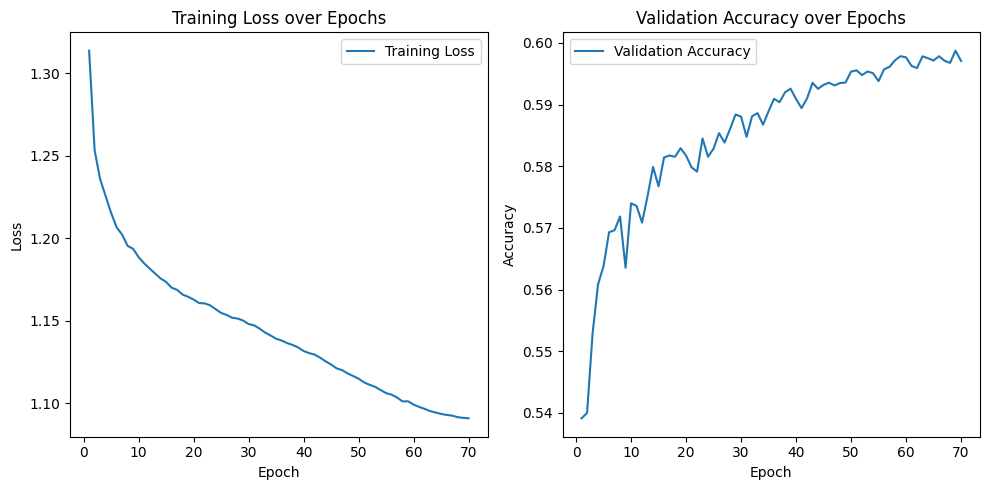

In [ ]:
import matplotlib.pyplot as plt

# Training loop
train_losses = []
validation_accuracies = []

# Training loop
best_accuracy = 0.0
best_model_state_dict = None

print_interval = 1  # Print training info every 5 epochs

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_losses.append(average_loss)
    
    # Print training info every print_interval epochs
    if (epoch + 1) % print_interval == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss}')

    # Step the scheduler at the end of each epoch
    scheduler.step()

    # Evaluation on the validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    validation_accuracies.append(accuracy)
    
    # Print validation info every print_interval epochs
    if (epoch + 1) % print_interval == 0:
        print(f'Validation Accuracy: {accuracy}')

    # Save the best model based on validation accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_state_dict = model.state_dict()

# Save the best model
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, 'best_model_2.pth')

# Plotting
epochs = range(1, num_epochs+1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


進行預測

In [ ]:
# Change the file path to the Parquet file
parquet_file_path = '/home/Arthur/Kaggle/dm2023-isa5810-lab2-homework/test_embedding.parquet'

# Read the Parquet file
test_df = pd.read_parquet(parquet_file_path, engine='pyarrow')


In [ ]:
test_df

,tweet_id,text,identification,embedding
2,0x28b412,"Confident of your obedience, I write to you, k...",test,"[-0.06591950356960297, 0.06816761195659637, -0..."
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test,"[-0.058752164244651794, 0.07664332538843155, 0..."
9,0x218443,When do you have enough ? When are you satisfi...,test,"[-0.03841771185398102, 0.057513527572155, -0.0..."
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,"[-0.07382025569677353, 0.04028724879026413, 0...."
33,0x26289a,"In these tough times, who do YOU turn to as yo...",test,"[-0.02996697835624218, 0.11783508211374283, -0..."
...,...,...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th...",test,"[-0.031542785465717316, 0.03534887358546257, -..."
1867529,0x2a980e,"""There is a lad here, which hath five barley l...",test,"[-0.06596267223358154, 0.04206155240535736, -0..."
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test,"[-0.02927554026246071, 0.06280770152807236, -0..."
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test,"[-0.024915682151913643, 0.04589500650763512, 0..."


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
# from your_model_module import DeepenedNN  

# 載入模型
model_state_dict = torch.load('/home/Arthur/Kaggle/best_model_2.pth')

# 實例化一個新的模型
model = DeepenedNN(input_size, hidden_sizes, output_size)
model.load_state_dict(model_state_dict)

# Assuming you have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 前處理 Test Data
# 將 'embedding' 欄位轉換為模型輸入所需的格式
test_embeddings = torch.tensor(test_df['embedding'].tolist(), dtype=torch.float32).to(device)

# 使用模型進行預測
model.eval()
with torch.no_grad():
    predictions = model(test_embeddings)

predicted_labels = torch.argmax(predictions, dim=1).cpu().numpy()

# Inverse transform the predicted labels
predicted_emotions = label_encoder.inverse_transform(predicted_labels)

# 將預測結果整合到 test_df 中
test_df['emotion'] = predicted_emotions

test_df.drop(columns=['text', 'identification', 'embedding'], inplace=True)
test_df.rename(columns={"tweet_id": "id"}, inplace=True)

# 保存包含預測結果的 DataFrame
test_df.to_csv('/home/Arthur/Kaggle/predictions/test_predictions_11.csv', index=False, encoding='utf-8')


In [ ]:
test_df

,id,emotion
2,0x28b412,anticipation
4,0x2de201,trust
9,0x218443,joy
30,0x2939d5,anticipation
33,0x26289a,trust
...,...,...
1867525,0x2913b4,joy
1867529,0x2a980e,anticipation
1867530,0x316b80,sadness
1867531,0x29d0cb,joy
